# Welcome to the ending of your second module at KS :)



The sharing of this workbook entails that you are moving on a good pace 🥰 Let's jump on to some advance stuff now, eh?

R E M E M B E R:       **PANDAS** documentation is going to be your bestie for this assignment!

### **PART 1 - GET TO KNOW YOUR DATA!**

This time we are going to pull data directly from the internet.

Step 1: Import the neccessary libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime


Step 2: Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and save it in a variable named food.

In [2]:
#Hint: to get the date, check what sort of delimiter would you use?
food_address="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
food=pd.read_csv(food_address,sep="\t")

Step 3: I want to see what the first ten rows of the dataset looks like. How?

In [3]:
food.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 4. What is the number of observations in the dataset?

In [4]:
print("Number of observations in dataset are",food.shape[0])

Number of observations in dataset are 4622


Step 5. What is the number of columns in the dataset?

In [5]:
print(f"Number of columns in dateset are {food.shape[1]}")

Number of columns in dateset are 5


Step 6. Print the name of all the columns.

In [6]:
print(f"Name of the columns are{food.columns}")

Name of the columns areIndex(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


Step 7. How is the dataset indexed?

In [7]:
#Hint: think or look for a command that gives information about the dataset but this time, only the index from the dataset.
food.index

RangeIndex(start=0, stop=4622, step=1)

Step 8. Which was the most-ordered item?

In [8]:
most_ordered_item=food.groupby("item_name")["quantity"].agg(sum).sort_values().tail(1)
most_ordered_item

<ipython-input-8-c4e4e8220871>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  most_ordered_item=food.groupby("item_name")["quantity"].agg(sum).sort_values().tail(1)


,quantity
item_name,
Chicken Bowl,761


Step 9. For the most-ordered item, how many items were ordered?

In [9]:
most_ordered_item

,quantity
item_name,
Chicken Bowl,761


Step 10. What was the most ordered item in the choice_description column?

In [10]:
choice_description_items=food.groupby("choice_description")["quantity"].agg(sum).sort_values().tail(1)
choice_description_items

<ipython-input-10-5e46882f65f5>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  choice_description_items=food.groupby("choice_description")["quantity"].agg(sum).sort_values().tail(1)


,quantity
choice_description,
[Diet Coke],159


Step 11. How many items were orderd in total?

In [11]:
total_ordered_items=food.groupby("item_name")["quantity"].agg(sum).values.sum()
total_ordered_items

<ipython-input-11-4db9232d8778>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_ordered_items=food.groupby("item_name")["quantity"].agg(sum).values.sum()


4972

Step 12. Turn the item price into a float

In [12]:
food["item_price"]=food["item_price"].str.replace("$","")
# food["item_price"]=pd.to_numeric(food["item_price"])
food["item_price"].convert_dtypes(float)


,item_price
0,2.39
1,3.39
2,3.39
3,2.39
4,16.98
...,...
4617,11.75
4618,11.75
4619,11.25
4620,8.75


Step 12.a. Check the item price type

In [13]:
#check itemprice type before changing  it
food["item_price"].dtypes

dtype('O')

Step 12.b. Create a lambda function and change the type of item price.

In [14]:
#Hint: You can first create a lambda function and then store it in a variable. After that, you can (APPLY) it on the relevant column :)
float_item_price_func=lambda x:x.replace("$","")
food["item_price"]=pd.to_numeric(food["item_price"].apply(float_item_price_func))

Step 12.c. Check the item price type now

In [15]:
#make sure the itemprice type has changed now
food["item_price"].dtypes

dtype('float64')

Step 13. How much was the revenue for the period in the dataset?

In [16]:

#Hint: Revenue = Quantity into ItemPrice
Revenue=food["quantity"]*food["item_price"]
print("Revenue was $ ",Revenue.sum())

Revenue was $  39237.02


Step 14. How many orders were made in the period?

In [17]:
food[food["order_id"].isnull()]
total_orders=food["order_id"].tail(1)
print("total orders are",total_orders.values)

total orders are [1834]


Step 15. What is the average revenue amount per order?

In [18]:
food["revenue"]=Revenue

In [19]:
food.groupby("order_id")["revenue"].agg(sum).mean()

<ipython-input-19-2e9328c41d66>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  food.groupby("order_id")["revenue"].agg(sum).mean()


21.39423118865867

In [20]:
food.drop(columns="revenue",inplace=True)

Step 16. How many different items are sold?

In [21]:
len(food["item_name"].value_counts())

50

### **Part 2 - FILTER AND SORT YOUR DATA!**

Step 17. How many products cost more than $10.00?

In [22]:
len(food[food["item_price"]>10])


1130

In [23]:
# you already  converted the itemprice into flaot, now delete the duplicates in item_name and quantity.
# select only the products with quantity equals to 1 and then print the unqiue count only


# food.drop_duplicates(subset="item_name")

In [24]:
 food[food.quantity==1].value_counts()

order_id  quantity  item_name           choice_description                                                                       item_price
926       1         Chicken Bowl        [Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Lettuce]]       8.75          3
1011      1         Canned Soft Drink   [Coke]                                                                                   1.25          3
724       1         Canned Soft Drink   [Coke]                                                                                   1.25          3
576       1         Barbacoa Bowl       [Roasted Chili Corn Salsa]                                                               9.25          2
1125      1         Chicken Burrito     [Fresh Tomato Salsa, [Rice, Cheese, Lettuce]]                                            8.75          2
                                                                                                                                              ..
626       1         Canned Soft Drink   [Sprite]                                                                                 1.25          1
                    Steak Bowl          [Tomatillo Red Chili Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]            9.25          1
627       1         Chicken Burrito     [Fresh Tomato Salsa, [Guacamole, Lettuce, Sour Cream, Fajita Vegetables, Cheese, Rice]]  11.25         1
                    Steak Soft Tacos    [Tomatillo Green Chili Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Guacamole]]  11.75         1
1834      1         Chicken Salad Bowl  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Lettuce]]                          8.75          1
Name: count, Length: 3150, dtype: int64

Step 18. Sort by the name of the item

In [25]:
food.sort_values(by="item_name")

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


Step 19. What was the quantity of the most expensive item ordered?

In [26]:
expensive_item_index=(food["item_price"]/food["quantity"]).idxmax()
qty_most_expensive_item=food.loc[expensive_item_index,"quantity"]
qty_most_expensive_item

# This is quantity of the most expensive item ordered . In answers sheet that was the item largest quantity not most expensive

2

Step 20. How many times did someone order more than one Canned Soda?

In [27]:
#Hint: you can also use boolean condition
len(food[(food["item_name"]=="Canned Soda")&(food["quantity"]>1)])

20

BONUS QUESTION: Pandas is used for Data Analysis. Create some unique pandas insight from your dataset and code it here.

Bonus Question is optional, but attempting it would result in 5 Grace Points :)

In [28]:
# We can find most expensive customized item
most_expensive_customization=food.iloc[(food["quantity"]*food["item_price"]).idxmax(),[-3,-2]]
most_expensive_customization

# Using this code we can find the choice description of the item with make that item most expensive.

,3598
item_name,Chips and Fresh Tomato Salsa
choice_description,NaN


### **THE END!!!**
or maybe not :)


We still need to practice Grouping more.

### **PART 3 - GROUPING!!**

But now, we will be changing our dataset a bit. Get your dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user) and store it in a variable called users.

In [29]:
#Hint: this time, you may need to change your choice of delimieter. Check and see how the values are being seperated.
#Also this time, be on a lookout of what column would you use as an index?
users=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep=("|"),index_col="user_id")
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


Step 1. Discover what is the mean age per occupation

In [30]:
users.groupby("occupation")["age"].mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


Step 2. Discover the Male ratio per occupation and sort it from the most to the least

In [31]:
#The output of this cell is given below. Your output should match this!

#In Simple words, you have to calculate the percentage of male users grouped by their occupation.
count_of_gender=users.groupby("occupation").size()
count_of_male_gender=users[users.gender=="M"].groupby("occupation").size()
male_gender_ratio=count_of_male_gender*100/count_of_gender
male_gender_ratio.sort_values(ascending=False)

,0
occupation,
doctor,100.000000
engineer,97.014925
technician,96.296296
retired,92.857143
programmer,90.909091
executive,90.625000
scientist,90.322581
entertainment,88.888889
lawyer,83.333333


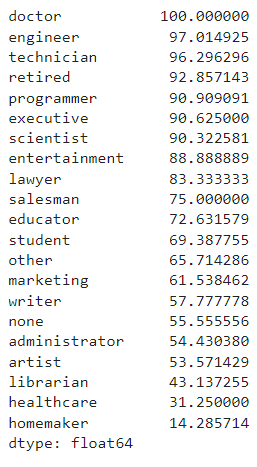

Step 3. For each occupation, calculate the minimum and maximum ages

In [32]:
min_age_df=users.groupby(["occupation"])[["age"]].min()
max_age_df=users.groupby(["occupation"])[["age"]].max()
min_age_df.rename(columns={"age":"min"},inplace=True)
min_age_df["max"]=max_age_df['age']
min_age_df

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 4.  For each combination of occupation and gender, calculate the mean age

In [33]:
users.groupby(["occupation","gender"])["age"].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.166667
               M         33.216667
retired        F         70.000000
               M         62.538462
salesman       F         27.000000
               M         38.555556
scientist      F         28.333333
               M         36.321429
student        F         20.750000
               M         22.669118
technician     F         38.000000
               M         32.961538
writer         F         37.631579
               M         35.346154
Name: age, dtype: float64

Step 5. For each occupation present the percentage of women and men

In [34]:
occup_count=users.groupby("occupation")["gender"].size()
gender_Male_count=(users[users["gender"]=="M"].groupby("occupation")[["gender"]].size())*100/occup_count
gender_Female_count=(users[users["gender"]=="F"].groupby("occupation")["gender"].size())*100/occup_count
pd.DataFrame({"Male":gender_Male_count,"Female":gender_Female_count})

,Male,Female
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,NaN
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286


Easy, right? I knew you could do it 💯

You are just left with 2 modules :)

### **PART 4 - APPLY**

Get your data from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv) and store it in a variable called crime

In [87]:
#read your data and display first 5 rows
crime=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv")
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


Step 1. What is the type of the columns?

In [88]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


Step 2. Convert the type of the column Year to datetime64

In [89]:
crime["Year"]=pd.to_datetime(crime.Year ,format="%Y")

Step 3. Set the Year column as the index of the dataframe

In [90]:
crime.set_index("Year",inplace=True)

Step 4. Delete the Total column

In [91]:
crime.drop(columns="Total",inplace=True)

Step 5. Group the year by decades and sum the values.

***Pay attention to the Population column number, summing this column is a mistake***

In [93]:
# To learn more about .resample (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)
# To learn more about Offset Aliases (http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

# Uses resample to sum each decade
crime=crime.resample("10YS").sum()
# Uses resample to get the max value only for the "Population" column
crime["Population"]=crime['Population'].resample("10YS").max()
crime
# Updating the "Population" column

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000.0,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000.0,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000.0,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813.0,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550.0,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056.0,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


Bonus Question: What is the most dangerous decade to live in the US?

In [94]:
#Hint: Violent shows how dangerous the decade is
crime.idxmax(axis=0)

,0
Population,2010-01-01
Violent,1990-01-01
Property,1990-01-01
Murder,1990-01-01
Forcible_Rape,1990-01-01
Robbery,1990-01-01
Aggravated_assault,1990-01-01
Burglary,1980-01-01
Larceny_Theft,1990-01-01
Vehicle_Theft,1990-01-01


### **PART 5 - MERGE/JOIN**

For this one, we will create our own dataset.

We will be dealing with both Numpy and Pandas in this one.

Step 1. Import the necessary libraries

In [74]:
import numpy as np
import pandas as pd
import datetime

Step 2. **Create 3 differents Series, each of length 100, as follows:**

1. The first a random number from 1 to 4

2. The second a random number from 1 to 3

3. The third a random number from 10,000 to 30,000

In [43]:
#name them s1,s2,s3
s1=pd.Series(np.random.randint(1,4,size=100))
s2=pd.Series(np.random.randint(1,3,size=100))
s3=pd.Series(np.random.randint(10000,30000,size=100))


Step 3. Let's create a DataFrame by joinning the Series by column.

In [44]:
#try concat, but figure out the axis on your own :)
df=pd.concat([s1,s2,s3],axis=1)

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [45]:
df.rename(columns={0:"bedrs",1:"bathrs",2:"price_sqr_meter"},inplace=True)

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [46]:
#join concat the values but still change the series into a df as well
bigcolumn=pd.concat([s1,s2,s3])
bigcolumn=pd.DataFrame(bigcolumn)
bigcolumn

,0
0,2
1,1
2,3
3,1
4,1
...,...
95,25461
96,24806
97,18803
98,13020


Oops, it seems it is going only until index 99. Is it true?

In [47]:
#This question warrants a theoretical response. No code is required in this cell block

#If no, then why not?

#If yes, then why yes?
# Yes the reason is that we concatinated all series and all had same indexes and it does not reset indexes by default .
# and while creating dataframe we did not gave any specific index .that's why when creating a dataframe the index name
# will be remain same and index values can be repeated.

Step 6. Reindex the DataFrame so it goes from 0 to 299

In [48]:
bigcolumn.reset_index()

,index,0
0,0,2
1,1,1
2,2,3
3,3,1
4,4,1
...,...,...
295,95,25461
296,96,24806
297,97,18803
298,98,13020


### ***TA-DA. That's it. THE END!***